In [1]:
import pandas as pd
import pprint

import cleandata.outliers as ol

In [2]:
nls97 = pd.read_csv('data/nls97f.csv')
nls97.set_index('personid', inplace=True)
covidtotals = pd.read_csv('data/covidtotals720.csv')

In [3]:
dist = ol.get_dist_prop(covidtotals.total_cases_pm)
pprint.pprint(dist)

{'count': 209,
 'kurtosis': 26.137524276840452,
 'mean': 2297.02214354067,
 'median': 868.866,
 'norm_p_value': '0.0: Reject Normal',
 'norm_stat': 0.5617035627365112,
 'skew': 4.284484653881833,
 'std': 4039.8402026537815}


In [4]:
sum_vars = ['satmath', 'wageincome']
other_vars = ['originalid','highestdegree','gender','maritalstatus']
outliers = ol.get_outliers(nls97, sum_vars, other_vars)
outliers.varname.value_counts(sort=False)

satmath        10
wageincome    260
Name: varname, dtype: int64

In [5]:
outliers.loc[outliers.varname == 'satmath', other_vars + sum_vars]

,originalid,highestdegree,gender,maritalstatus,satmath,wageincome
223058,6696,0. None,Female,Never-married,46.0,30000.0
267254,1622,2. High School,Female,Never-married,48.0,100000.0
291029,7088,2. High School,Female,NaN,51.0,NaN
337438,159,2. High School,Female,Married,200.0,NaN
399109,3883,2. High School,Female,NaN,36.0,NaN
448463,326,4. Bachelors,Female,NaN,47.0,NaN
738290,7705,0. None,Female,NaN,7.0,NaN
748274,3394,4. Bachelors,Male,Married,42.0,NaN
799095,535,5. Masters,Female,Never-married,59.0,120000.0
955430,2547,2. High School,Female,Married,200.0,NaN


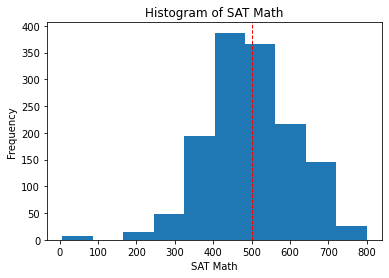

In [6]:
ol.make_plot(nls97.satmath, "Histogram of SAT Math", "SAT Math")

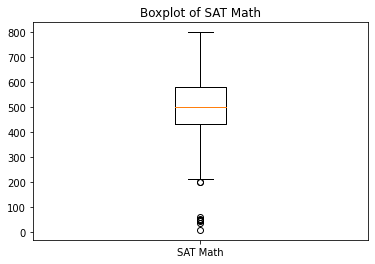

In [7]:
ol.make_plot(nls97.satmath, "Boxplot of SAT Math", "SAT Math", "box")